In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import random 

In [2]:
def load_jsonl(input_path) -> list:
    """
    Read list of objects from a JSON lines file.
    """
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.rstrip('\n|\r')))
    print('Loaded {} records from {}'.format(len(data), input_path))
    db_data = []
    db_cols = ['premise', 'hypothesis', 'label', 'predicted_scores', 'predicted_label']
    for d in data:
        db_data.append([])
        for col in db_cols:
            db_data[-1].append(d.get(col, float('nan')))
    return pd.DataFrame(db_data, columns=db_cols)

In [3]:
def load_anli(input_path) -> list:
    """
    Read list of objects from a JSON lines file.
    """
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.rstrip('\n|\r')))
    print('Loaded {} records from {}'.format(len(data), input_path))
    db_data = []
    db_cols = ['uid','context', 'hypothesis', 'label', 'model_label', 'emturk', 'genre', 'reason', 'tag']
    for d in data:
        db_data.append([])
        for col in db_cols:
            db_data[-1].append(d.get(col, float('nan')))
    return pd.DataFrame(db_data, columns=db_cols)

In [4]:
def print_analysis(df, df_fix):
    if (df.loc[2][1] != df_fix.loc[2][1]) or (len(df) != len(df_fix)):
        print("Eval results not for the same set")
    else:
        print("Example premise: ", df.loc[2][0])
        print("Example hypothesis: ", df.loc[2][1])

        n = len(df)
        print("Accuracy of original model: ", "%.3f" % (1 - sum(df['label']!=df['predicted_label'])/n))
        print("Accuracy of fixed model: ", "%.3f" % (1 - sum(df_fix['label']!=df_fix['predicted_label'])/n))

        sizes = [sum(df['predicted_label']==i)/n for i in range(3)]
        sizes_fix = [sum(df_fix['predicted_label']==i)/n for i in range(3)]
        labels = 'Entailment', 'Neutral', 'Contradiction'
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        ax1.pie(sizes, autopct='%1.1f%%', startangle=90)
        ax2.pie(sizes_fix, autopct='%1.1f%%', startangle=90)
        ax1.set_title("Original model's predicted labels")
        ax2.set_title("Fixed model's predicted labels")
        fig.legend(labels=labels)
        plt.show()
    

# Evaluation on SNLI validation set

Loaded 9842 records from eval_results/original.jsonl
Loaded 9842 records from eval_results/original_fix.jsonl
Example premise:  Two women are embracing while holding to go packages.
Example hypothesis:  The men are fighting outside a deli.
Accuracy of original model:  0.896
Accuracy of fixed model:  0.877


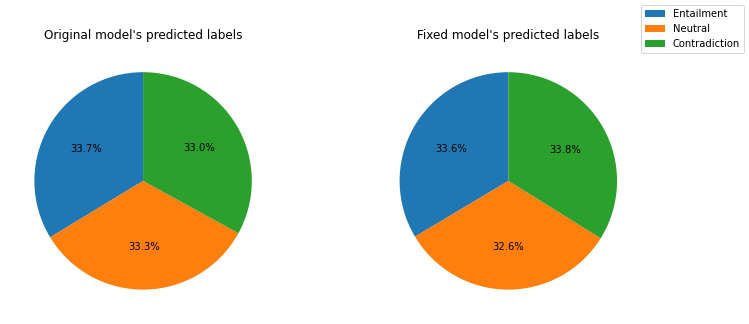

In [5]:
df_og = load_jsonl('eval_results/original.jsonl')
df_og_fix = load_jsonl('eval_results/original_fix.jsonl')
print_analysis(df_og, df_og_fix)

# Evaluation on validation set with repeated hypotheses

All hypotheses from the default set were modified to repeat themselves once.

Loaded 9842 records from eval_results/repeat.jsonl
Loaded 9842 records from eval_results/repeat_fix.jsonl
Example premise:  Two women are embracing while holding to go packages.
Example hypothesis:  The men are fighting outside a deli. The men are fighting outside a deli.
Accuracy of original model:  0.496
Accuracy of fixed model:  0.881


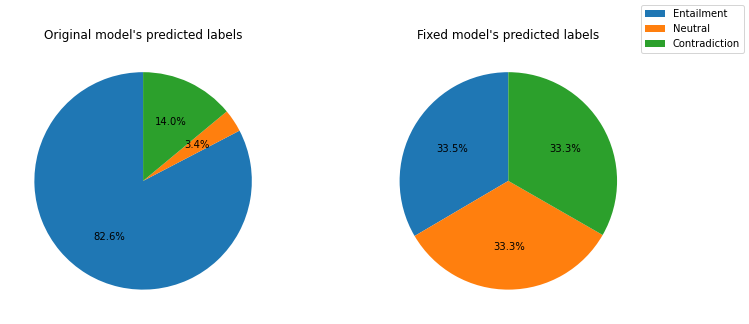

In [6]:
df_rp = load_jsonl('eval_results/repeat.jsonl')
df_rp_fix = load_jsonl('eval_results/repeat_fix.jsonl')
print_analysis(df_rp, df_rp_fix)

The accuracy calculation assumes that the true labels do not change when the hypotheses are repeated. 

# Evaluation on nonsense set

All hypotheses from the validation set were changed to the same nonsense sentence: "The pizza goes to Jupiter on a rocket ship."

Loaded 9842 records from eval_results/nonsense.jsonl
Loaded 9842 records from eval_results/nonsense_fix.jsonl
Example premise:  Two women are embracing while holding to go packages.
Example hypothesis:  The pizza goes to Jupiter on a rocket ship. 
Accuracy of original model:  1.000
Accuracy of fixed model:  1.000


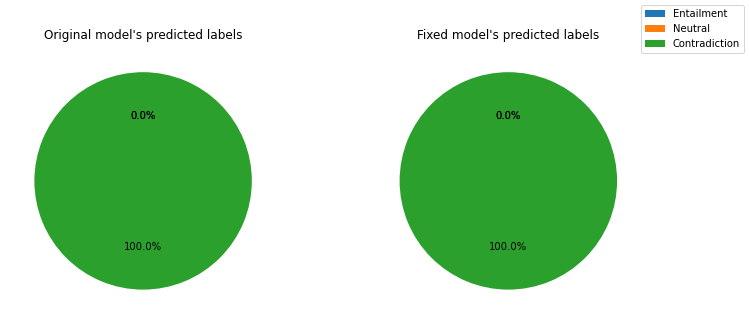

In [7]:
df_ns = load_jsonl('eval_results/nonsense.jsonl')
df_ns_fix = load_jsonl('eval_results/nonsense_fix.jsonl')
print_analysis(df_ns, df_ns_fix)

The accuracy calculation assumes that all true labels in this set are contradiction.

# Evaluation on nonsense set with nearly repeated hypotheses

Loaded 2000 records from eval_results/nonsense_near.jsonl
Loaded 2000 records from eval_results/nonsense_near_fix.jsonl
Example premise:  Two women are embracing while holding to go packages.
Example hypothesis:  The pizza goes to Jupiter on a rocket ship. The pizza goes to Jupiter on a rocket.
Accuracy of original model:  0.949
Accuracy of fixed model:  1.000


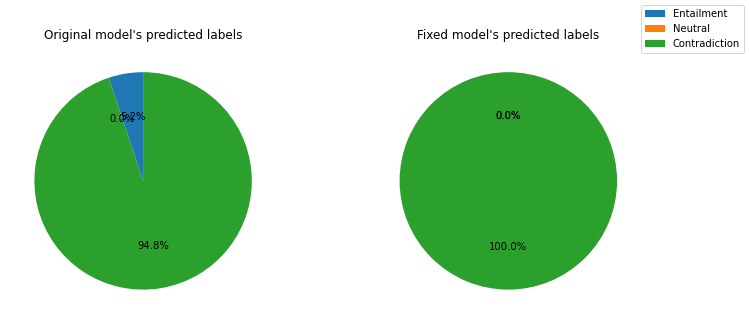

In [8]:
df_nsnr = load_jsonl('eval_results/nonsense_near.jsonl')
df_nsnr_fix = load_jsonl('eval_results/nonsense_near_fix.jsonl')
print_analysis(df_nsnr, df_nsnr_fix)

# Evaluation on nonsense set with repeated hypotheses

Loaded 9842 records from eval_results/nonsense_repeat.jsonl
Loaded 9842 records from eval_results/nonsense_repeat_fix.jsonl
Example premise:  Two women are embracing while holding to go packages.
Example hypothesis:  The pizza goes to Jupiter on a rocket ship. The pizza goes to Jupiter on a rocket ship. 
Accuracy of original model:  0.001
Accuracy of fixed model:  1.000


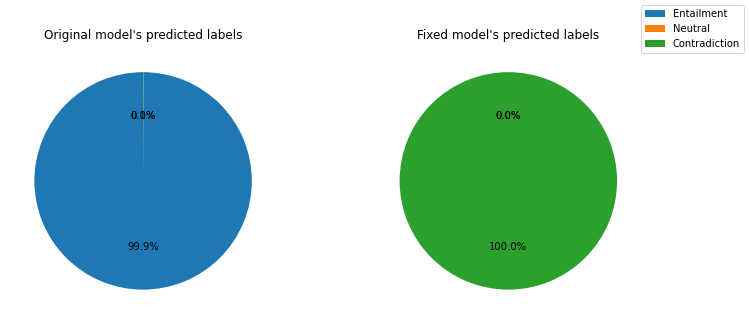

In [9]:
df_nsrp = load_jsonl('eval_results/nonsense_repeat.jsonl')
df_nsrp_fix = load_jsonl('eval_results/nonsense_repeat_fix.jsonl')
print_analysis(df_nsrp, df_nsrp_fix)

# Performance of Original and Fixed Models on ANLI test sets

https://arxiv.org/abs/1910.14599

"We introduce a new large-scale NLI benchmark dataset, collected via an iterative, adversarial human-and-model-in-the-loop procedure."

In [10]:
df = pd.read_csv('eval_results/anli/summary.csv', index_col=False)
df

,ANLI test set,Original,Fixed
0,R1,0.304,0.304
1,R2,0.304,0.316
2,R3,0.317,0.322
